## Dataset Creation

In [10]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial

%matplotlib inline
# matplotlib.style.use('ggplot')

In [11]:
def getDataframe(filename):
    readFile = open(filename, 'r')
    reader = csv.reader(readFile)

    data = list()  
    for row in reader:
        data.append(row)
    readFile.close()

    df = pd.DataFrame.from_dict(data)
    df.columns = df.iloc[0]
    df = df[1:]
    df['RTT'] = pd.to_numeric(df['RTT'], downcast="float")
    df['MessageSize'] = pd.to_numeric(df['MessageSize'], downcast="integer")
    df['NumberOfMessages'] = pd.to_numeric(df['NumberOfMessages'], downcast="integer")
    df[df.columns[4]] = pd.to_numeric(df[df.columns[4]], downcast="integer")
    
    return df

In [12]:
def getBenchmark(benchmark):
    resultsFolder = "../credentials/results/Benchmark"+str(benchmark)+"/"
    resultsFiles = os.listdir(resultsFolder)

    df = getDataframe(resultsFolder+resultsFiles[0])
    for i in range(len(resultsFiles)-1):
        df = pd.concat([df, getDataframe(resultsFolder+resultsFiles[i+1])])
    return df
    

In [13]:
def plot_results(df, messagesComb, yerror, legentOut, title, x_label, x_column):
    fig, ax = plt.subplots(figsize=(10, 6))

#     ax.set_title(title +'\n', fontsize=20)
    ax.set_ylabel('Média de RTT (ms)\n', fontsize=16)
    ax.set_xlabel('\n'+x_label, fontsize=16)
    legend = []
    fmt= ['--s', '--o', '--d', '--v']
    
    cont = 0
    for comb in messagesComb:
        legend.append("\nNº Mensagens: " + str(comb[1]) + "\nTamanho Mensagem: " + str(comb[0])+ '\n')
        exp = df[df.MessageSize == comb[0]]
        exp = exp[exp.NumberOfMessages == comb[1]]
        if yerror:
            plt.errorbar(exp[x_column], exp['RTT_mean']/exp['RTT_std'], fmt=fmt[cont])
        else:
             plt.errorbar(exp[x_column], exp['RTT_mean'], fmt=fmt[cont])
        cont+=1
    if legentOut:
        ax.legend(legend, loc='upper right', bbox_to_anchor=(1.36 , 1.015), fontsize=12)
    else:
        ax.legend(legend, fontsize=12)
    fig.tight_layout()

In [14]:
def plot_results_loss_rate(df, messagesComb, yerror, legentOut, title, x_label, x_column):
    fig, ax = plt.subplots(figsize=(10, 6))

#     ax.set_title(title +'\n', fontsize=20)
    ax.set_ylabel('Taxa de Perda de Mensagens (%)\n', fontsize=16)
    ax.set_xlabel('\n'+x_label, fontsize=16)
    legend = []
    fmt= ['--s', '--o', '--d', '--v']
    
    cont = 0
    for comb in messagesComb:
        legend.append("\nNº Mensagens: " + str(comb[1]) + "\nTamanho Mensagem: " + str(comb[0])+ '\n')
        exp = df[df.MessageSize == comb[0]]
        exp = exp[exp.NumberOfMessages == comb[1]]
        if yerror:
            plt.errorbar(exp[x_column], exp['Messages_Delivered']/exp.NumberOfMessages , fmt=fmt[cont])
        else:
             plt.errorbar(exp[x_column], exp['Messages_Delivered']/exp.NumberOfMessages , fmt=fmt[cont])
        cont+=1
    if legentOut:
        ax.legend(legend, loc='upper right', bbox_to_anchor=(1.36 , 1.015), fontsize=12)
    else:
        ax.legend(legend, fontsize=12)
    fig.tight_layout()

As funções abaixo servem para fazer uma aprocimação otimizadas dos gráficos gerados.

A função **funcE** aproxima a curva para uma exponencial, e **funcL** aproxima para uma reta.

In [15]:
def funcPoisson(k, lamb):
    return np.exp(-lamb)*np.power(lamb, k)/factorial(k)

def funcLog(x, a, b, c):
    return b*np.log(a*x) + c


def funcExp(x, a, b, c):
    return b*np.exp(a*x) + c

def funcLin(x, a, b):
    return a*x + b

## Dataset Statistics

In [6]:
df = getBenchmark(1)

In [8]:
df.size

750000

In [7]:
print("Valores Máximos:",df.max()["RTT"])
print("Valores Mínimos:", df.min()["RTT"])
print("Valores Médios:", df.mean()["RTT"])
print("Valores Desvio:", df.std()["RTT"])

Valores Máximos: 209.0
Valores Mínimos: 0.0
Valores Médios: 2.33775
Valores Desvio: 1.87799


In [ ]:
plt.figure(figsize=(10,4))
plt.hist(df['RTT'], bins=range(int(df.min()["RTT"]),int(df.max()["RTT"]),5), 
         histtype='bar', ec='black', color='blue')
plt.title("RTT Histogram")
plt.show()

## Benchmark 1

In [72]:
df = getBenchmark(1)
df = df.groupby(['NumberOfHosts', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std', 'count']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std', 'Messages_Delivered']
df = df.reset_index()
df

,NumberOfHosts,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,2,1,1000,2.882000,1.0,25.0,2.333135
1,2,1,2000,2.571500,1.0,23.0,1.961329
2,2,1000,1000,3.495000,1.0,31.0,2.513223
3,2,1000,2000,3.021500,1.0,28.0,2.126570
4,4,1,1000,2.426667,1.0,18.0,1.724223
5,4,1,2000,2.150500,0.0,209.0,3.094799
6,4,1000,1000,3.075000,1.0,47.0,2.500825
7,4,1000,2000,2.643167,1.0,55.0,2.071526
8,6,1,1000,2.512600,1.0,52.0,2.284225
9,6,1,2000,2.088400,0.0,43.0,1.652349


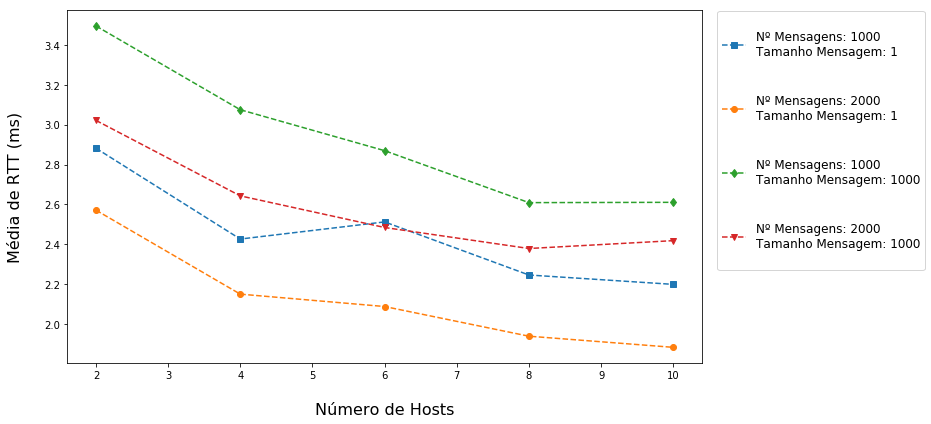

In [81]:
messagesComb = [(1,1000),(1,2000), (1000,1000),(1000,2000)]
plot_results(df, messagesComb, False, True,
             'Benchmark 1 - Número de Hosts', 
             'Número de Hosts', 
             'NumberOfHosts')


## Benchmark 2

In [66]:
df = getBenchmark(2)
df = df.groupby(['NumberOfSender', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std', 'count']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std', 'Messages_Delivered']
df = df.reset_index()
df

,NumberOfSender,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,2,1,1000,3.2730,1.0,108.0,4.284019
1,2,1,2000,2.7130,1.0,114.0,3.817449
2,2,1000,1000,3.7210,1.0,124.0,4.875339
3,2,1000,2000,2.9860,1.0,122.0,3.594894
4,4,1,1000,3.2090,1.0,106.0,3.945236
5,4,1,2000,2.5045,1.0,114.0,3.071432
6,4,1000,1000,3.6770,1.0,130.0,4.718361
7,4,1000,2000,3.0595,1.0,133.0,3.606586
8,6,1,1000,2.9940,1.0,86.0,3.206282
9,6,1,2000,2.8700,1.0,83.0,2.569709


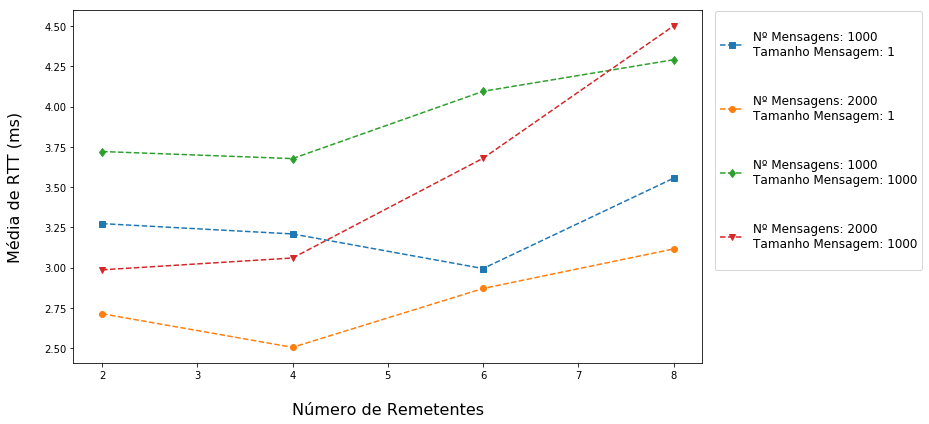

In [67]:
messagesComb = [(1,1000),(1,2000),(1000,1000),(1000,2000)]
plot_results(df, messagesComb,  False, True,
            'Benchmark 2 - Recepção Massiva (1 Destinatário)', 
            'Número de Remetentes', 
            'NumberOfSender')

## Benchmark 3

In [68]:
df = getBenchmark(3)
df = df.groupby(['NumberOfPairs', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std', 'count']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std', 'Messages_Delivered']
df = df.reset_index()
df

,NumberOfPairs,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,2,1,1000,3.1300,1.0,119.0,4.248665
1,2,1,2000,2.4750,1.0,111.0,3.151562
2,2,1000,1000,3.7880,1.0,122.0,4.752224
3,2,1000,2000,2.9200,1.0,127.0,3.435622
4,4,1,1000,3.3260,1.0,112.0,4.494210
5,4,1,2000,2.6340,1.0,110.0,3.291422
6,4,1000,1000,3.7480,1.0,117.0,4.390646
7,4,1000,2000,3.1995,1.0,115.0,3.574785
8,6,1,1000,2.9210,1.0,84.0,3.398869
9,6,1,2000,2.6405,1.0,92.0,2.680457


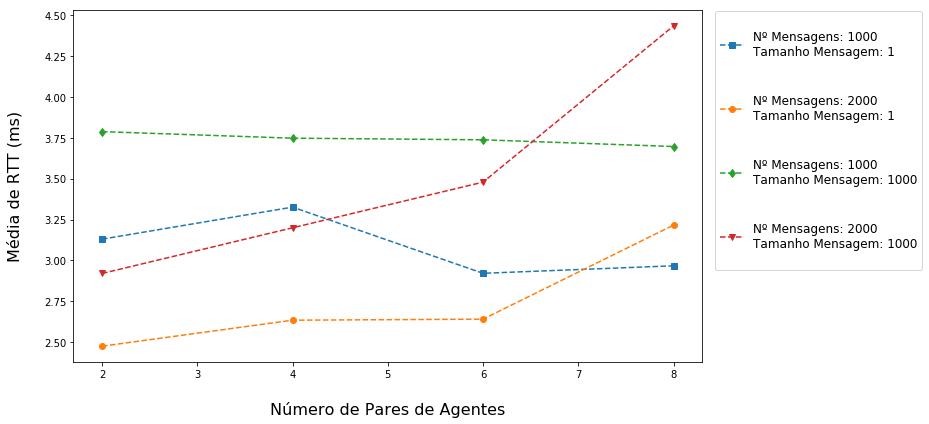

In [69]:
messagesComb = [(1,1000),(1,2000),(1000,1000),(1000,2000)]
plot_results(df, messagesComb,  False, True,
            'Benchmark 3 - Recepção Massiva (N Destinatários)', 
            'Número de Pares de Agentes', 
            'NumberOfPairs')

## Benchmark 4 - InterPlataforma

In [56]:
df = getBenchmark(4)
df = df.groupby(['AgentsPerHost', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std', 'count']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std', 'Messages_Delivered']
df = df.reset_index()
df

,AgentsPerHost,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,5,1,250,22.164000,1.0,132.0,19.094593
1,5,1,500,16.525999,1.0,232.0,16.875393
2,10,1,250,153.255997,2.0,725.0,101.408905
3,10,1,500,157.682007,1.0,557.0,96.465851
4,15,1,250,421.832001,1.0,1256.0,225.551056
5,15,1,500,449.696014,1.0,1260.0,187.018021
6,20,1,250,763.843994,234.0,1997.0,264.894379
7,20,1,500,743.171997,17.0,2252.0,285.569611


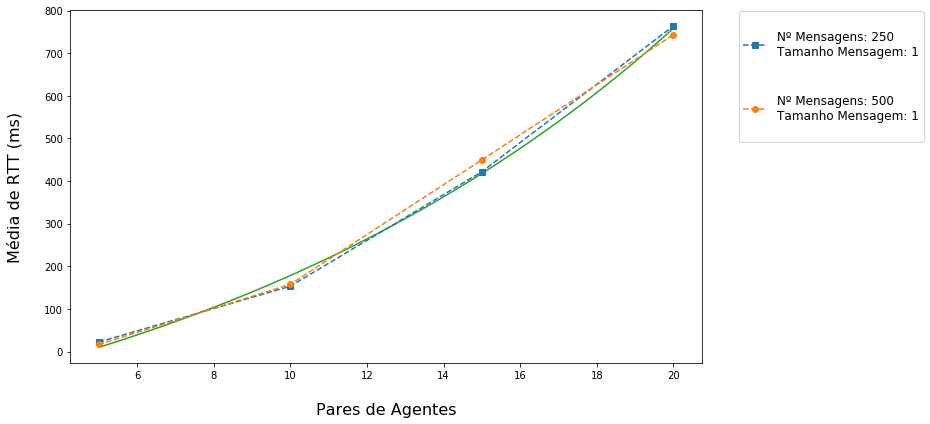

In [58]:
func = funcExp

messagesComb = [(1,250), (1,500)]
plot_results(df, messagesComb, False, True,
            'Benchmark 4 (InterPlataforma)- Número de Agentes por Host', 
            'Pares de Agentes', 
            'AgentsPerHost')

popt, pcov = curve_fit(func, df['AgentsPerHost'], df['RTT_mean'])

xdata = np.linspace(5, 20, 100)
plt.plot(xdata, func(xdata, *popt))

In [37]:
print("a = ", popt[0])
print("b = ", popt[1])
print("c = ", popt[2])

a =  0.0703839555908
b =  280.835280376
c =  -389.424807428


## Benchmark 4 - IntraPlataforma

In [16]:
df = getBenchmark(5)
df = df.groupby(['AgentsPerHost', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std', 'count']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std', 'Messages_Delivered']
df = df.reset_index()
df

,AgentsPerHost,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std,Messages_Delivered
0,10,1,1000,0.389389,0.0,23.0,2.163999,999
1,100,1,1000,0.427427,0.0,34.0,1.202239,999
2,200,1,1000,0.420420,0.0,30.0,1.998352,999
3,400,1,1000,0.322322,0.0,33.0,1.953931,999


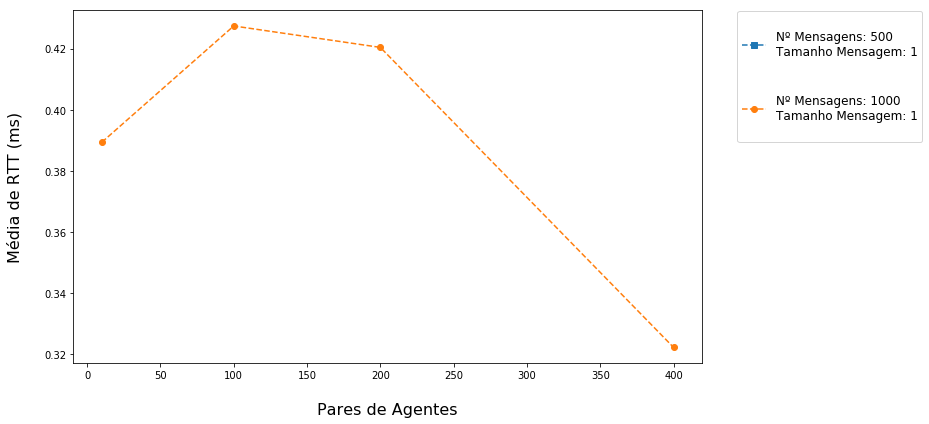

In [18]:
# func = funcExp

messagesComb = [(1,1000),(1,2000),(1000,1000),(1000,2000)]
plot_results(df, messagesComb, False, True,
            'Benchmark 4 (Intraplataforma) - Número de Agentes por Host', 
            'Pares de Agentes', 
            'AgentsPerHost')

# popt, pcov = curve_fit(func, df['AgentsPerHost'], df['RTT_mean'])

xdata = np.linspace(5, 20, 100)
# plt.plot(xdata, func(xdata, *popt))

In [40]:
print("a = ", popt[0])
print("b = ", popt[1])
print("c = ", popt[2])

a =  0.136192078829
b =  22.9163794143
c =  -41.0950860286
